# Практична робота №1
### студентки групи МІТ-31
### Шмат Катерини Сергіївни

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("./practice1_data.csv")

In [7]:
numeric_col = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']

corr_matrix = df.loc[:,numeric_col].corr()

print(corr_matrix)

           x1        x2        x3        x4        x5        x6        x7  \
x1   1.000000  0.141328 -0.049096  0.003410  0.006109  0.021734  0.003005   
x2   0.141328  1.000000  0.711802  0.014490  0.011354  0.015733 -0.116861   
x3  -0.049096  0.711802  1.000000 -0.041992 -0.019994  0.021822 -0.096961   
x4   0.003410  0.014490 -0.041992  1.000000  0.007296  0.064577 -0.006380   
x5   0.006109  0.011354 -0.019994  0.007296  1.000000  0.020858  0.013196   
x6   0.021734  0.015733  0.021822  0.064577  0.020858  1.000000 -0.019264   
x7   0.003005 -0.116861 -0.096961 -0.006380  0.013196 -0.019264  1.000000   
x8   0.211104  0.136553  0.708262 -0.067614 -0.046600  0.021491 -0.232216   
x9   0.478183  0.856873  0.570822  0.013124 -0.000884  0.022219 -0.436025   
x10 -0.074145  0.020045  0.126227 -0.010433  0.046132  0.038047  0.085227   

           x8        x9       x10  
x1   0.211104  0.478183 -0.074145  
x2   0.136553  0.856873  0.020045  
x3   0.708262  0.570822  0.126227  
x4  -0.0

На основании анализа корреляционной матрицы выбранными столбиками будут х3, х4, х7, х8 и х10 

In [8]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
0,2.163950,0.015729,-1.136593,2.182571,-1.552051,-0.909067,1.791084,-1.094894,0.308272,-0.912365,0
1,1.364464,-1.359741,-1.881798,-0.484231,-1.974301,-0.017010,2.184909,-1.012308,-0.774774,-3.702803,0
2,1.237133,0.945965,-0.008633,0.889645,0.348132,-1.863290,-1.093229,0.057705,1.646754,-0.834884,2
3,0.530019,2.739019,1.168152,-0.182967,-0.313546,1.274500,1.097952,-0.909685,1.490564,2.300722,1
4,-1.169403,-0.387841,0.049067,-2.136358,-1.839488,-0.635955,-0.136341,0.357952,-0.376029,-2.323494,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       1500 non-null   float64
 1   x2       1500 non-null   float64
 2   x3       1500 non-null   float64
 3   x4       1500 non-null   float64
 4   x5       1500 non-null   float64
 5   x6       1500 non-null   float64
 6   x7       1500 non-null   float64
 7   x8       1500 non-null   float64
 8   x9       1500 non-null   float64
 9   x10      1500 non-null   float64
 10  classes  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


In [10]:
df = df.drop("x1", axis = 1)
df = df.drop("x2", axis = 1)
df = df.drop("x5", axis = 1)
df = df.drop("x6", axis = 1)
df = df.drop("x9", axis = 1)
df.head()

,x3,x4,x7,x8,x10,classes
0,-1.136593,2.182571,1.791084,-1.094894,-0.912365,0
1,-1.881798,-0.484231,2.184909,-1.012308,-3.702803,0
2,-0.008633,0.889645,-1.093229,0.057705,-0.834884,2
3,1.168152,-0.182967,1.097952,-0.909685,2.300722,1
4,0.049067,-2.136358,-0.136341,0.357952,-2.323494,2


In [11]:
df.describe()

,x3,x4,x7,x8,x10,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,-0.383910,-0.017770,0.056311,-0.244578,0.524397,1.497333
std,1.390968,0.976437,1.560251,1.594473,1.558246,1.117807
min,-4.554755,-3.402785,-4.975684,-4.642937,-4.764986,0.000000
25%,-1.364413,-0.631979,-1.112853,-1.338483,-0.475189,0.000000
50%,-0.462918,0.009628,-0.064162,-0.432473,0.593918,1.000000
75%,0.522196,0.625042,1.215963,0.844740,1.538664,2.000000
max,4.930330,3.357813,4.344007,6.598312,5.798377,3.000000


In [12]:
df["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

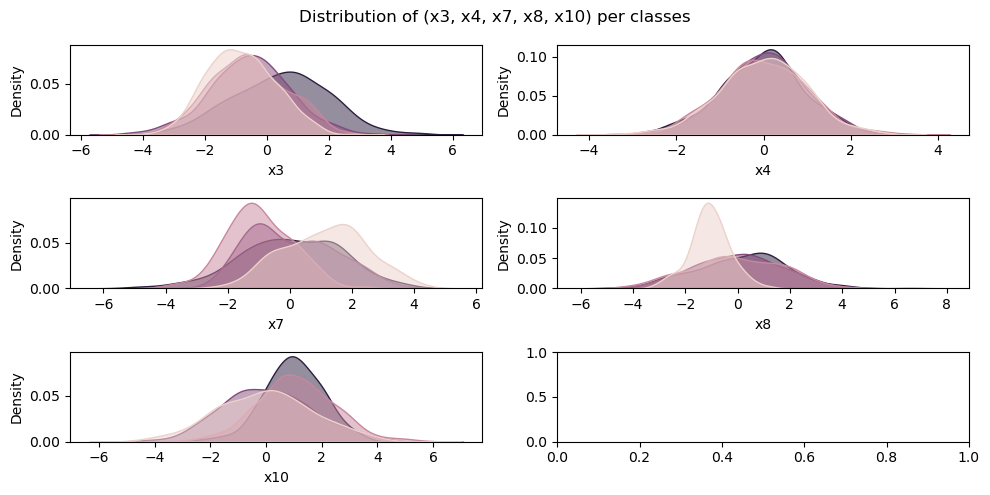

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Distribution of (x3, x4, x7, x8, x10) per classes')


sns.kdeplot(ax = axes[0,0], data = df, x = 'x3', hue = "classes", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("x3")
axes[0,0].get_legend().remove()


sns.kdeplot(ax = axes[0,1], data = df, x = 'x4', hue = "classes", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("x4")
axes[0,1].get_legend().remove()


sns.kdeplot(ax = axes[1,0], data = df, x = 'x7', hue = "classes", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("x7")
axes[1,0].get_legend().remove()


sns.kdeplot(ax = axes[1,1], data = df, x = 'x8', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x8")
axes[1,1].get_legend().remove()


sns.kdeplot(ax = axes[2,0], data = df, x = 'x10', hue = "classes", alpha = 0.5, shade = True)
axes[2,0].set_xlabel("x10")
axes[2,0].get_legend().remove()


plt.tight_layout()

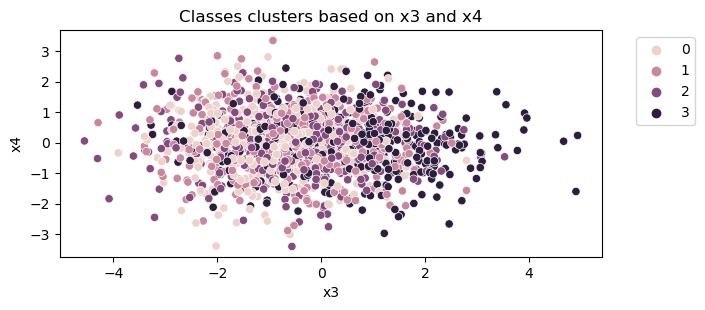

In [15]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x4', hue = "classes")
plt.title("Classes clusters based on x3 and x4")
plt.xlabel("x3")
plt.ylabel("x4")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

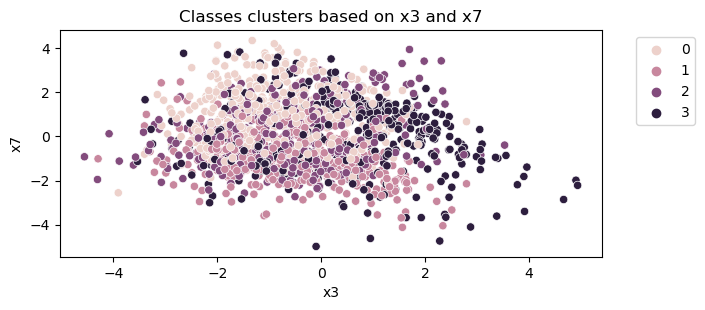

In [30]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x7', hue = "classes")
plt.title("Classes clusters based on x3 and x7")
plt.xlabel("x3")
plt.ylabel("x7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

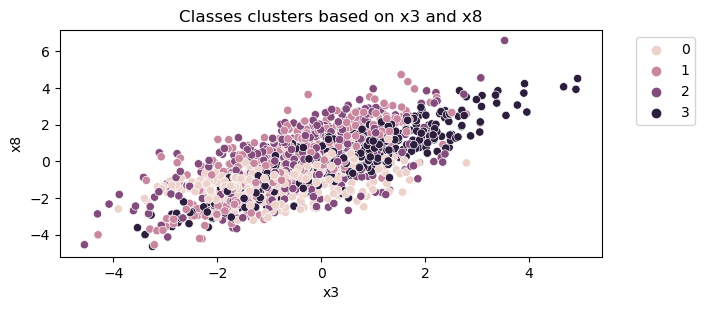

In [31]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x8', hue = "classes")
plt.title("Classes clusters based on x3 and x8")
plt.xlabel("x3")
plt.ylabel("x8")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

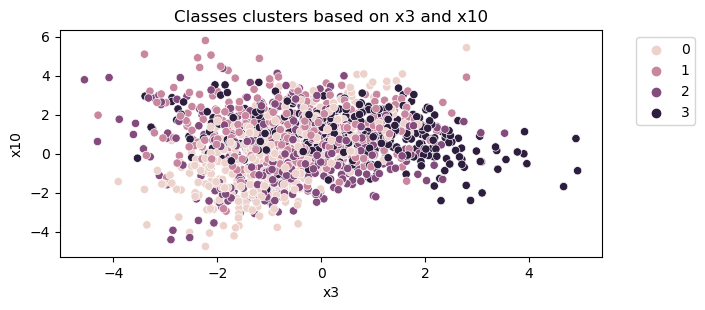

In [32]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x3', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x3 and x10")
plt.xlabel("x3")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

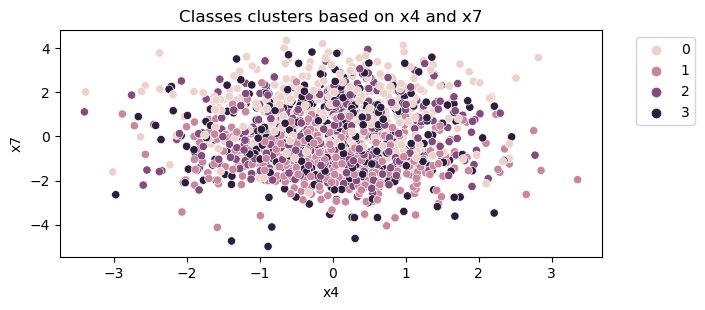

In [33]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x4', y = 'x7', hue = "classes")
plt.title("Classes clusters based on x4 and x7")
plt.xlabel("x4")
plt.ylabel("x7")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

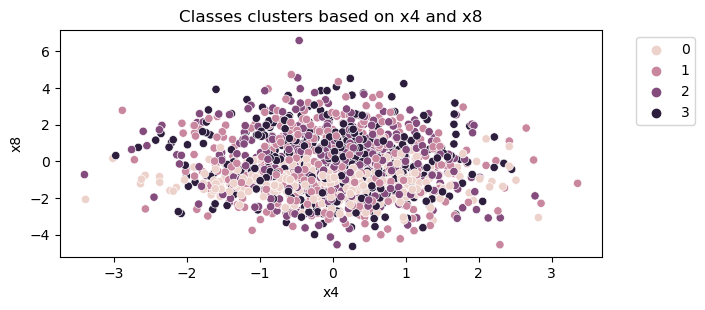

In [34]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x4', y = 'x8', hue = "classes")
plt.title("Classes clusters based on x4 and x8")
plt.xlabel("x4")
plt.ylabel("x8")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

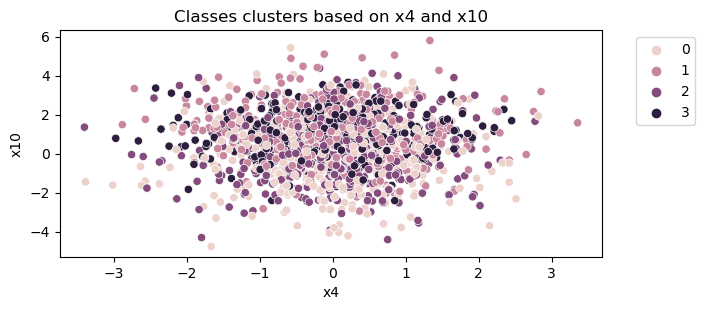

In [35]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x4', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x4 and x10")
plt.xlabel("x4")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

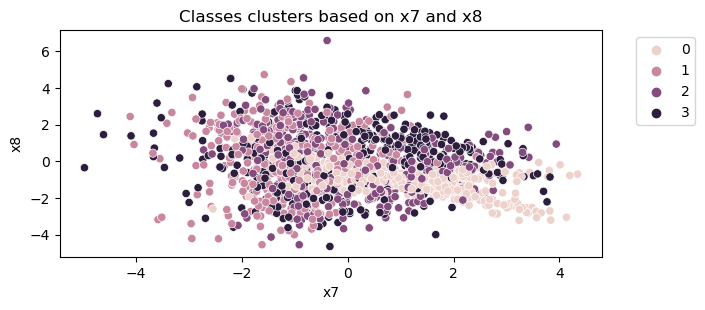

In [36]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'x8', hue = "classes")
plt.title("Classes clusters based on x7 and x8")
plt.xlabel("x7")
plt.ylabel("x8")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

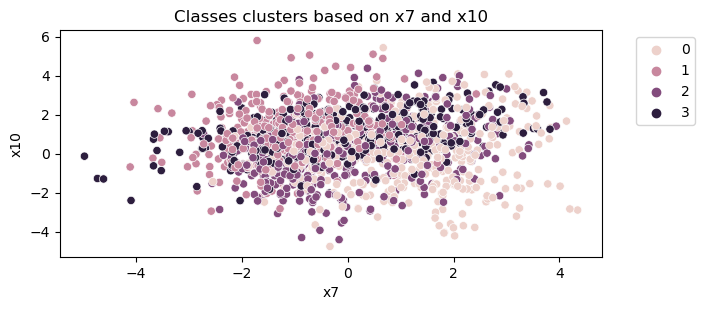

In [37]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x7 and x10")
plt.xlabel("x7")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

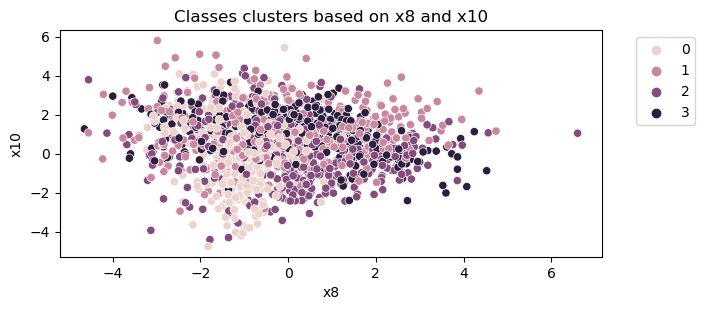

In [38]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x8', y = 'x10', hue = "classes")
plt.title("Classes clusters based on x8 and x10")
plt.xlabel("x8")
plt.ylabel("x10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

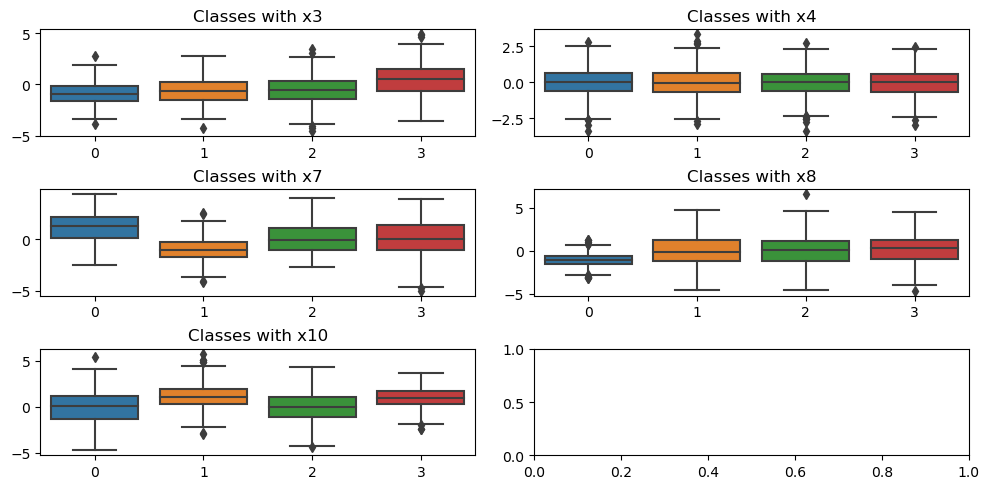

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(10,5), dpi = 100)


sns.boxplot(ax = axes[0,0], data = df, x = "classes", y = 'x3')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("Classes with x3")



sns.boxplot(ax = axes[0,1], data = df, x = "classes", y = 'x4')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Classes with x4")


sns.boxplot(ax = axes[1,0], data = df, x = "classes", y = 'x7')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("Classes with x7")


sns.boxplot(ax = axes[1,1], data = df, x = "classes", y = 'x8')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("Classes with x8")


sns.boxplot(ax = axes[2,0], data = df, x = "classes", y = 'x10')
axes[2,0].set_xlabel(None)
axes[2,0].set_ylabel(None)
axes[2,0].set_title("Classes with x10")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

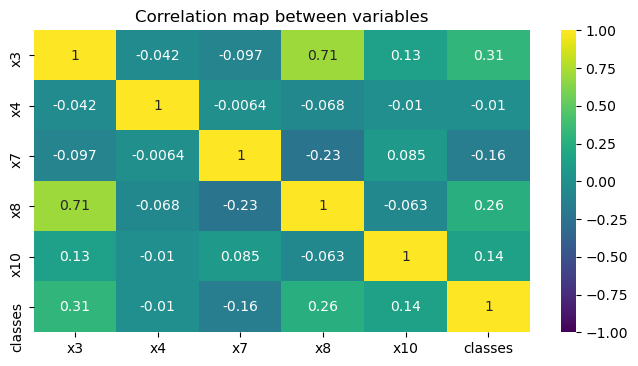

In [18]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
plt.show()

In [19]:
X = df.drop("classes", axis = 1)
y = df["classes"]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(Scaled_X_train, y_train)

LogisticRegression()

In [23]:
y_pred = log_model.predict(Scaled_X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [25]:
confusion_matrix(y_test, y_pred)

array([[48,  5,  8, 13],
       [ 4, 54,  9,  6],
       [11, 19, 26, 12],
       [17, 16,  7, 45]], dtype=int64)

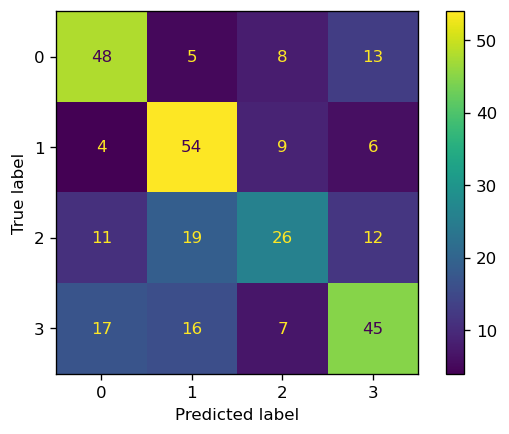

In [26]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax);

In [27]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.58

In [28]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.60      0.65      0.62        74
           1       0.57      0.74      0.65        73
           2       0.52      0.38      0.44        68
           3       0.59      0.53      0.56        85

    accuracy                           0.58       300
   macro avg       0.57      0.58      0.57       300
weighted avg       0.57      0.58      0.57       300

